In [71]:
findnextclusterKF(1,5,P)

key is 1
key is 3
key is 4
key is 5


5.0

In [30]:
avy

13.06683606557377

In [86]:
# need another find next cluster function
def findnextclusterKF(iframe, icluster, P):
    
    # init ky
    ky = -1
    
    # average velocity
    velx = 4.2
    vely = 1.3
    dt = 1
    # extra change p_x, extra change p_y, change v_x, change v_y 
    u = array(([[4.0], [12.0], [0], [0]]))

    #P = array([[10, 0, 0 , 0], [0, 10, 0, 0], [0, 0, 100, 0], [0, 0, 0, 100]])

    F = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])

    #H = array([[1,0,0,0], [0,1,0,0], [0,0,0,0], [0,0,0,0]])
    H = array([[1,0,0,0], [0,1,0,0]])

    # meas noise
    R = array([[0.1,0], [0,0.1]])

    B = np.eye(4)

    Q = np.eye(4)
    xvalues1 = []
    yvalues1 = []
    pathname = "file_out"+str(iframe)+".csv"
    firstrow=0
    
    
    with open(pathname) as csv_file:
        m = f
        currentmap={}
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        for row in csv_reader:
            # don't skip first row
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            if clusterid == icluster:
                xvalues1.append(xpoint)
                yvalues1.append(ypoint)
    # find x1 based on icluster 
    avx1 = np.mean(xvalues1)
    avy1 = np.mean(yvalues1)
    
    x1 = x1 = array(([[avx1], [avy1], [velx], [vely]])) 
    x1, P = predict1(x1, P)
    
    xvalues =[]
    yvalues =[]
    currentdistances=[]
    
    pathname2 = "file_out"+str(iframe+1)+".csv"
    with open(pathname) as csv_file:
        m = f
        currentmap={}
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        obnum = 1
        for row in csv_reader:
            clusterid = float(row[0])
            
            if clusterid != obnum:
                numo1 = float(obnum)
                mapdistances[numo1] = currentdistances
                totxvalues[numo1] = xvalues
                totyvalues[numo1] = yvalues
                clusters[numo1] = currentcluster
                obnum = clusterid
                currentdistances=[]
                xvalues=[]
                yvalues=[]
                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xvalues.append(xpoint)
            yvalues.append(ypoint)
            currentcluster = clusterid
            
            # distance from predicted point x1
            dx1 = x1[0] - xpoint
            dy1 = x1[1] - ypoint
            d1 = pow(dx1,2)+pow(dy1,2)
            dist = math.sqrt(d1)
            # save
            currentdistances.append(dist)
        # find min 
        for j in range(0, mx):
            meandistances = np.mean(mapdistances[j])
            if meandistances <m:
                m = meandistances
                ky =j
                #print("key is", ky)
        return ky #clusters[ky]
    
    
    

In [2]:
# KF step 1

# PART B STEP 2 
# determine initial pos and velocity

#  (1) determine average speed
# determine based on traj file

# (2) determine average x velocity and y velocity (break into sep components)
#tfile ="april2019/2019-02-27-12-19-36_Velodyne-HDL-32-Data-BF1-CL1-Traj.csv"

trajfile = "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"

#tfile =  "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"


import math
import csv

trajnum = 0
obnum=1
irow=0
settimestamp=[]
setx = []
sety = []
every5 = 0

arrayvel=[]
arrayvelx =[]
arrayvely=[]

with open(trajfile) as csv_file:
    csv_reader= csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count ==0:
            line_count=1
            continue
        if line_count==1:
            line_count=2
            prevrow = row
            prevx = float(row[6])
            prevy = float(row[7])
            pts = float(row[2])*0.000001
        xval = float(row[6])
        yval = float(row[7])
        trajnum = float(row[0])
        timestamp = float(row[2])
        ts = timestamp*0.000001
        # test for 0 timestamp
        if timestamp==0:
            prevx = xval
            prevy = yval
            pts = 0
            continue
        if pts ==0:
            pts = ts
            prevx = xval
            prevy = yval
            continue
        every5 = every5+1
        if every5 == 1:
            pts = ts
            prevx = xval
            prevy = yval 
            
        if every5 == 5:
            diff = ts - pts
            if diff==0:
                continue
            xdist = xval - prevx
            ydist = yval - prevy
            xdist2 = pow(xdist, 2)
            ydist2 = pow(ydist, 2)
            dist = pow(xdist2+ydist2, 0.5)
            v = dist/float(diff)
            vx = xdist/float(diff)
            vy = ydist/float(diff)
            if dist!=0:
                arrayvel.append(v)
                arrayvelx.append(vx)
                arrayvely.append(vy)
            every5= 0
        else:
            continue
        if trajnum != obnum:
            prevx = xval
            prevy = yval
            pts =ts
            obnum = trajnum

    
        
            

In [3]:
#KF step 2

# set values of init. velocity
import numpy as np
avx= np.mean(arrayvelx)
avy= np.mean(arrayvely)



In [27]:
avx 

42.80165573770492

In [5]:
# KF step 5

from numpy.linalg import inv
def predict1(x, P):
    x = np.dot(F, x) + np.dot(B, u)
    P = np.dot(F, np.dot(P, F.transpose())) + Q
    return x, P

def update1(x, P, z):
    y = z - np.dot(H,x)
    S = np.dot(H, np.dot(P, H.transpose()))
    K = np.dot(P, np.dot(H.transpose(), inv(S)))
    #print("k",K)
    #print("y", y)
    x = x+ np.dot(K,y)
    P = P - np.dot(K, np.dot(H, P))
    xs.append(x)
    cov.append(P)
    return x, P

def update2(x, P,z):
    S = np.dot(np.dot(H, P), H.transpose()) + R
    K = np.dot(np.dot(P, H.transpose()), inv(S))
    z = matrix([z])
    y = z.transpose() - np.dot(H, x)
    x = x + np.dot(K, y)
    P = P - np.dot(np.dot(K,H), P)
    return x, P

In [6]:
# KF step 6

from numpy import *

In [12]:
velx

0.4672467021913508

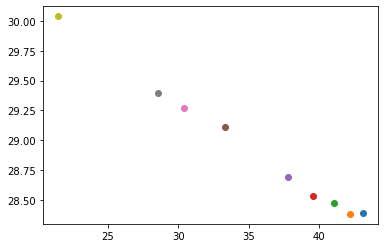

In [78]:
# KF step 7  (one cluster)

### input parameters
initialframe = 10
n = 20 # ending frame 
 
initialcluster = 5

###
from collections import defaultdict

import matplotlib.pyplot as plt
import csv

velx= avx/10
vely=avy/10


# parameters of step 5


obnum =1


xvalues = []
yvalues = []

hxvalues =[]
hyvalues= []


# initialize distances map 
mapdistances = defaultdict(list)

totxvalues = defaultdict(list)
totyvalues = defaultdict(list)


currentcluster = 0
clusters = defaultdict(list)

f = 1000 # default value

for j in range(0, mx):
    mapdistances[j]=[]
    totxvalues[j] = []
    totyvalues[j] = []
    clusters[j] = []

currentdistances = []


outputclusters = []
outputclusters.append(initialcluster)

    
pathname = "file_out"+str(initialframe)+".csv"
firstrow=0
    
xvalues1= []
yvalues1 = []

with open(pathname) as csv_file:
    m = f
    currentmap={}
    csv_reader = csv.reader(csv_file, delimiter=",")

    for row in csv_reader:
        # don't skip first row
        clusterid = float(row[0])
        xpoint = float(row[1])
        ypoint = float(row[2])
        if clusterid == initialcluster:
            xvalues1.append(xpoint)
            yvalues1.append(ypoint)
# find x1 based on icluster 
avx1 = np.mean(xvalues1)
avy1 = np.mean(yvalues1)

#print("start point x", avx1)
#print("start point y", avy1)

x1 = array(([[avx1], [avy1], [velx], [vely]])) 


for i in range(initialframe+1, n): # not need to process initial frame
    pathname = "file_out"+str(i)+".csv"
    firstrow=0
    for j in range(0, mx):
        mapdistances[j]= []
        totxvalues[j]= []
        totyvalues[j]= []
        clusters[j] = []
    # predict
    x1, P = predict1(x1, P)
    
    with open(pathname) as csv_file:
        m = f
        currentmap={}
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        for row in csv_reader:
            # don't skip first row
            clusterid = float(row[0])
            
            if clusterid != obnum:
                numo1 = float(obnum)
                mapdistances[numo1] = currentdistances
                totxvalues[numo1] = xvalues
                totyvalues[numo1] = yvalues
                clusters[numo1] = currentcluster
                obnum = clusterid
                currentdistances=[]
                xvalues=[]
                yvalues=[]
                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xvalues.append(xpoint)
            yvalues.append(ypoint)
            currentcluster = clusterid
            
            #print("x1", x1)
            #print("x1[0]", x1[0])
            
            # distance from predicted point x1
            dx1 = x1[0] - xpoint
            dy1 = x1[1] - ypoint
            d1 = pow(dx1,2)+pow(dy1,2)
            dist = math.sqrt(d1)
            # save
            currentdistances.append(dist)
        # find min
        for j in range(0, mx):
            meandistances = np.mean(mapdistances[j])
            if meandistances <m:
                m = meandistances
                ky =j
                #print("cluster", clusters[ky])
                
        outputclusters.append(clusters[ky])
        hxvalues = totxvalues[ky]
        hyvalues = totyvalues[ky]
        
        avx = np.mean(hxvalues)
        avy = np.mean(hyvalues)
        
        #print("avx is", avx)
        #print("avy is", avy)
        
        # measurement, update
        z1 = [avx, avy]
        
        x1, P = update2(x1, P, z1)
        
        #plt.scatter(hxvalues, hyvalues)
        plt.scatter(avx, avy)
        hxvalues=[]
        hyvalues=[]
plt.show()
            
            
        


In [79]:
outputclusters

[5, 5.0, 7.0, 6.0, 7.0, 4.0, 5.0, 3.0, 3.0, 2.0]

In [15]:
outputclusters

[3, 5.0, 6.0, 5.0, 7.0, 5.0, 6.0, 4.0, 2.0]

In [18]:
# rename

def findnextclusterapp(iframe, initialcluster): # frame and cluster
    datastorename = 'newdatastoreMay17.csv'
    outputmatched =0
    with open(datastorename) as datastore_csv_file:
        datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")

        for row in datastore_csv_reader:
            
            # 1 - frame 
            framenum = float(row[0])

            # 2 - cluster id
            clusterid = float(row[1])

            matched = float(row[18])  #return this matched

            if framenum < iframe:
                continue

            if clusterid == initialcluster:
                outputmatched = matched
                return outputmatched
            
    return outputmatched

In [149]:
# KF step 4

# combine the measurements and the kalman filter
# average the previous cluster for single pt 
# measure the min dist from cluster
from numpy import array

dt = 1
# p_x, p_y, v_x, v_y

#x1 = array(([[px0], [py0], [avx], [avy]])) 

# extra change p_x, extra change p_y, change v_x, change v_y 
u = array(([[4.0], [12.0], [0], [0]]))

P = array([[10, 0, 0 , 0], [0, 10, 0, 0], [0, 0, 100, 0], [0, 0, 0, 100]])

F = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])

#H = array([[1,0,0,0], [0,1,0,0], [0,0,0,0], [0,0,0,0]])
H = array([[1,0,0,0], [0,1,0,0]])
           
# meas noise
R = array([[0.1,0], [0,0.1]])

B = np.eye(4)

Q = np.eye(4)

In [135]:
P

array([[0.09664561, 0.        , 0.05791709, 0.        ],
       [0.        , 0.09664561, 0.        , 0.05791709],
       [0.05791709, 0.        , 1.66868908, 0.        ],
       [0.        , 0.05791709, 0.        , 1.66868908]])

In [76]:
x1

array([[       nan],
       [       nan],
       [3.82577241],
       [2.87226552]])

init clust 1


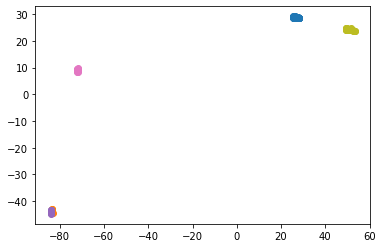

init clust 2


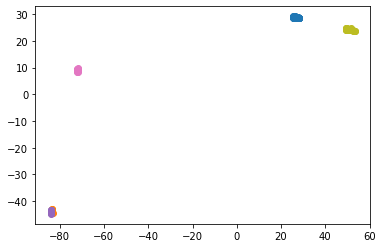

In [349]:
# complete 3

totalcomparisons=0
missedmatching =0
continuedmatching =0
wrongmatching=0
clustering_error=0

### input parameters
initialframe = 280
endframe = 290

n = endframe # ending frame 

c1= 1
c2 =2

maparrays = defaultdict(list)

for initialcluster in range(1, c2+1):


    velx= avx/10
    vely=avy/10
    u = array(([[4.0], [12.0], [0], [0]]))
    P = array([[10, 0, 0 , 0], [0, 10, 0, 0], [0, 0, 100, 0], [0, 0, 0, 100]])
    F = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
    H = array([[1,0,0,0], [0,1,0,0]])
    # meas noise
    R = array([[0.1,0], [0,0.1]])
    B = np.eye(4)
    Q = np.eye(4)


    # parameters of step 5


    obnum =1


    xvalues = []
    yvalues = []

    hxvalues =[]
    hyvalues= []


    # initialize distances map 
    mapdistances = defaultdict(list)

    totxvalues = defaultdict(list)
    totyvalues = defaultdict(list)


    currentcluster = 0
    clusters = defaultdict(list)

    f = 1000 # default value

    for j in range(0, mx):
        mapdistances[j]=[]
        totxvalues[j] = []
        totyvalues[j] = []
        clusters[j] = []

    currentdistances = []


    outputclusters = []
    outputclusters.append(initialcluster)


    pathname = "file_out"+str(initialframe)+".csv"
    firstrow=0

    xvalues1= []
    yvalues1 = []

    with open(pathname) as csv_file:
        m = f
        currentmap={}
        csv_reader = csv.reader(csv_file, delimiter=",")

        for row in csv_reader:
            # don't skip first row
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            if clusterid == initialcluster:
                xvalues1.append(xpoint)
                yvalues1.append(ypoint)
    # find x1 based on icluster 
    avx1 = np.mean(xvalues1)
    avy1 = np.mean(yvalues1)

    #print("start point x", avx1)
    #print("start point y", avy1)

    x1 = array(([[avx1], [avy1], [velx], [vely]])) 


    for i in range(initialframe+1, endframe): # not need to process initial frame
        pathname = "file_out"+str(i)+".csv"
        firstrow=0
        for j in range(0, mx):
            mapdistances[j]= []
            totxvalues[j]= []
            totyvalues[j]= []
            clusters[j] = []
        # predict
        x1, P = predict1(x1, P)

        with open(pathname) as csv_file:
            m = f
            currentmap={}
            csv_reader = csv.reader(csv_file, delimiter=",")

            for row in csv_reader:
                # don't skip first row
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    mapdistances[numo1] = currentdistances
                    totxvalues[numo1] = xvalues
                    totyvalues[numo1] = yvalues
                    clusters[numo1] = currentcluster
                    obnum = clusterid
                    currentdistances=[]
                    xvalues=[]
                    yvalues=[]
                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xvalues.append(xpoint)
                yvalues.append(ypoint)
                currentcluster = clusterid

                #print("x1", x1)
                #print("x1[0]", x1[0])

                # distance from predicted point x1
                dx1 = x1[0] - xpoint
                dy1 = x1[1] - ypoint
                d1 = pow(dx1,2)+pow(dy1,2)
                dist = math.sqrt(d1)
                # save
                currentdistances.append(dist)
            # find min
            for j in range(0, mx):
                meandistances = np.mean(mapdistances[j])
                if meandistances <m:
                    m = meandistances
                    ky =j
                    #print("cluster", clusters[ky])

            outputclusters.append(clusters[ky])
            hxvalues = totxvalues[ky]
            hyvalues = totyvalues[ky]

            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)

            #print("avx is", avx)
            #print("avy is", avy)

            # measurement, update
            z1 = [avx, avy]

            x1, P = update2(x1, P, z1)

            plt.scatter(hxvalues, hyvalues)
            #plt.scatter(avx, avy)
            hxvalues=[]
            hyvalues=[]
            
    print("init clust", initialcluster)
    plt.show()
    maparrays[initialcluster] = outputclusters
            
            
        


In [132]:
maparrays

defaultdict(list,
            {1: [1, 2.0, 2.0, 2.0, 2.0, 5.0, 4.0, 1.0, 2.0, 2.0],
             2: [2, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0],
             3: [3, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0],
             4: [4, 4.0, 6.0, 7.0, 7.0, 4.0, 3.0, 2.0, 5.0, 4.0],
             5: [5, 4.0, 5.0, 3.0, 2.0, 5.0, 4.0, 1.0, 2.0, 2.0]})

In [350]:
# analyze

for initialcluster in range(c1, c2+1):
    listclusterids = maparrays[initialcluster]
    result =[]
    result.append(initialcluster)
    iframe = initialframe
    currentcluster = initialcluster
    t = True
    while t:
        nextres = findnextclusterapp(iframe, currentcluster)
        if str(nextres) == "nan":
            break
        if nextres==0:
            break 
        if iframe > endframe: 
            break
        result.append(nextres)
        iframe = iframe+1
        currentcluster = nextres
    len1 = len(result)
    len2 = len(listclusterids)
    setlen = min(len1, len2)
    od1 = {}
    od2 = {}
    booleanwrong = []
    for j1 in range(0,setlen):
        nolongerwrong=0
        nolongerwrongoriginal=0
        frameno = initialframe + j1
        od1[frameno] = [result[j1]]
        od2[frameno] =[listclusterids[j1]]
        if result[j1]==listclusterids[j1]:
            nolongerwrong=1
            nolongerwrongoriginal=1
        if result[j1] != listclusterids[j1]:
            v1 = errorclusters.get(frameno)
            if v1 != None:
                errorarray = errorclusters[frameno]
                for el in errorarray:
                    if result[j1] in el:
                        if listclusterids[j1] in el:
                            nolongerwrong=1
        if nolongerwrong!= 1:
            booleanwrong.append(1) 
        else:
            booleanwrong.append(0)
            if nolongerwrongoriginal==0:
                clustering_error = clustering_error+1
    maxlen = max(len1, len2)
    last1 = result[setlen-1]
    last2 = listclusterids[setlen-1]
    if len1 != len2:
        for j2 in range(setlen, maxlen):
            nolongerwrong=0
            nolongerwrongoriginal=0
            frameno2 = initialframe+j2
            if len1>len2:
                next2 = findnextclusterKF(frameno2, last2, P)
                if next2 == result[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if result[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error = clustering_error+1
                else:
                    booleanwrong.append(1)
            if len2 > len1:
                next2 = findnextclusterapp(frameno2, last2)
                if next2 == listclusterids[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if listclusterids[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error= clustering_error+1
                else:
                    booleanwrong.append(1) # wrong
    d1 = {}
    d2 = {}
    for j1 in range(0, setlen):
        frameno = initialframe+j1
        clusters1 = od1[frameno]
        clusters2 = od2[frameno]
        simclusters = errorclusters.get(frameno)
        if simclusters!=None:
            simarray = errorclusters[frameno]
            for el in simarray:
                if od1[frameno] in el:
                    clusters1.extend(el)
                if od2[frameno] in el:
                    clusters2.extend(e1)
        d1[frameno] = clusters1
        d2[frameno] = clusters2
    maxlen = max(len1, len2)
    for j2 in range(setlen, maxlen):
        frameno = initialframe+j2
        d1[frameno] = []
        d2[frameno] = []
        if len1>len2:
            d1[frameno] = [result[j2]]
        if len2>len1:
            d2[frameno]= [listclusterids[j2]]
    d1[initialframe+maxlen] =[]
    d2[initialframe+maxlen]=[]
    setlen= min(len1, len2)
    for j in range(0, maxlen):
        frameno = initialframe+j
        clust1= d1[frameno]
        clust2 = d2[frameno]
        for c1 in clust1:
            nc1 = findnextclusterapp(frameno, c1)
            if str(nc1) =="nan":
                print("nc1 is nan")
                continue
            nclust1 = d1[frameno+1]
            if nc1 not in nclust1:
                nclust1.append(nc1) 
            d1[frameno+1] = nclust1
        for c2 in clust2:
            nc2 = findnextclusterKF(frameno, c2, P)
            if nc2==-1:
                continue
            if str(nc2) == "nan":
                continue
            nclust2 = d2[frameno+1]
            if nc2 not in nclust2:
                nclust2.append(nc2)
            d2[frameno+1]= nclust2
        if booleanwrong[j] ==1:
            set1=set(clust1)
            print("set1", set1)
            intersect= set1.intersection(clust2)
            if len(intersect)>0:
                booleanwrong[j]=0
                clustering_error=clustering_error+1
    bindex=1
    firstframewrong=-1
    for b in booleanwrong:
        if b==1:
            firstframewrong=bindex
            break
        bindex=bindex+1
    if firstframewrong==-1:
        totalcomparisons= totalcomparisons+maxlen
    else:
        totalcomparisons=totalcomparisons+firstframewrong
        
    contflag=0
    missedflag=0
    
    if np.sum(booleanwrong) >0:
        if firstframewrong>len1:
            print("continued")
            print("array1", result)
            print("array2", listclusterids)
            contflag=1
            continuedmatching=continuedmatching+1
        if firstframewrong > len2:
            print("missed")
            print("array1", result)
            print("array2", listclusterids)
            missedmatching= missedmatching+1
            missedflag=1
        if contflag==0 and missedflag==0:
            print("wrong")
            print("array1", result)
            print("array2", listclusterids)
            wrongmatching= wrongmatching+1
        if contflag==1 and missedflag==1:
            print("BOTH CONTINUED and MISSED")
        
                    
                

set1 {1.0}
set1 {1.0}


TypeError: unhashable type: 'list'

In [334]:
initialframe

270

In [127]:
x1

matrix([[ -2.66289661],
        [ 31.88282393],
        [ -4.88279989],
        [-11.93312846]])

In [351]:

print("missed", missedmatching)
print("continued", continuedmatching)
print("wrong", wrongmatching)
print("total", totalcomparisons)

print("clustering err", clustering_error)

missed 0
continued 0
wrong 0
total 0
clustering err 1


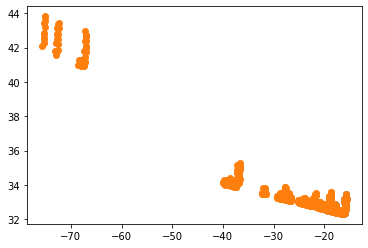

In [337]:
# plot other clusters
array1= [1]
array2= [1, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 1.0, 2.0]

result=array1
result2= array2

alen = len(result)
alen2 = len(result2)


acounter=0
# counter for array el

xv1 =[]
yv1=[]
xv2 = []
yv2 = []

for i in range(initialframe, initialframe+alen):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = result[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        xv1.extend(xarray)
        yv1.extend(yarray)
        #plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen:
        break

acounter=0
for i in range(initialframe, initialframe+alen2):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"

    
    a = result2[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                
                
        # plot
        xv2.extend(xarray)
        yv2.extend(yarray)
        #plt.scatter(xarray,yarray)
    
    acounter =acounter +1
    if acounter > alen2:
        break

#plt.scatter(xv2, yv2)
plt.scatter(xv1, yv1)
plt.scatter(xv2, yv2)
plt.show()



In [20]:
# load errorclusters
# pre processing step: load lidar_similarlabeledclusters.csv
import csv
# dictionary mapping framenumber to array of clusterids
errorclusters = {}

firstrow =0


#lidarsim = 'lidar_similarlabeledclusters.csv'
lidarsim = 'lidar_similarlabeledclusters_v2.csv'
with open(lidarsim) as lidarsim_csv_file:
    sim_csv_reader = csv.reader(lidarsim_csv_file, delimiter=",")
    for row in sim_csv_reader:
        # skip header row
        if firstrow==0:
            firstrow=1
            continue
        framenumber = int(row[0])
        arr = []
        cluster1 = row[1]
        cluster2 = row[2]
        cluster3 = row[3]
        arr.append(int(cluster1))
        if len(cluster2) > 0:
            arr.append(int(cluster2))
        if len(cluster3) >0:
            arr.append(int(cluster3))
        #print(row)
        errorcode = int(row[4])
        if errorcode == 1:
            # add to dictionary
            #print("add")
            v = errorclusters.get(framenumber)
            if v==None:
                errorclusters[framenumber] = [arr]
            else:
            # append additional array
                a = errorclusters[framenumber]
                alen = len(a)
                em = []
                for i in range(0, alen):
                    em.append(a[i])
                em.append(arr)
                
                errorclusters[framenumber] = em
            

In [21]:
errorclusters

{6: [[4, 5]],
 7: [[5, 6]],
 14: [[5, 7]],
 15: [[2, 3]],
 16: [[3, 4, 5]],
 17: [[2, 3, 4]],
 18: [[2, 3]],
 20: [[2, 3]],
 22: [[3, 4]],
 23: [[2, 3, 4]],
 24: [[2, 4, 3]],
 25: [[2, 3, 5]],
 26: [[2, 4, 5]],
 27: [[4, 5]],
 28: [[2, 4]],
 29: [[2, 3]],
 30: [[2, 3], [7, 9]],
 34: [[4, 5]],
 35: [[5, 6], [3, 10, 11]],
 36: [[5, 6]],
 38: [[5, 6, 7], [8, 9, 10]],
 39: [[6, 7], [10, 11]],
 41: [[5, 6], [1, 2], [8, 11, 12]],
 43: [[8, 11]],
 44: [[1, 7], [10, 11]],
 45: [[8, 7], [11, 12]],
 46: [[5, 6]],
 47: [[2, 3]],
 48: [[5, 6]],
 51: [[1, 2]],
 52: [[1, 2]],
 54: [[1, 2]],
 56: [[1, 2]],
 57: [[1, 2]],
 58: [[1, 2]],
 59: [[1, 2]],
 60: [[1, 2]],
 61: [[1, 2]],
 62: [[1, 2]],
 63: [[1, 2]],
 66: [[1, 2], [5, 6]],
 70: [[4, 5]],
 71: [[1, 3]],
 74: [[2, 3]],
 78: [[1, 6], [10, 11], [7, 8]],
 79: [[1, 2], [6, 7]],
 91: [[8, 10]],
 97: [[2, 3]],
 99: [[3, 5]],
 100: [[1, 4]],
 102: [[7, 8, 9]],
 103: [[2, 3]],
 114: [[4, 5]],
 115: [[1, 2]],
 118: [[1, 2]],
 119: [[1, 2]],
 123: [[1, 